In [2]:
import pandas as pd

In [4]:
# Load the dataset
file_path = '/Users/rush/Documents/Data/Wisconsin-House-Price/Original_Dataset_wide.csv'
data_wide = pd.read_csv(file_path)

# Convert the wide format data to long format
data_long = pd.melt(data_wide, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'],
                    var_name='Date', value_name='Price')

# Convert the Date column to a datetime format to ensure consistency
data_long['Date'] = pd.to_datetime(data_long['Date'], format='%m/%d/%y')
data_long['Year'] = data_long['Date'].dt.year

# Savinf output file
output_file_path = '/Users/rush/Documents/Data/Wisconsin-House-Price/Converted_Dataset_long.csv'
data_long.to_csv(output_file_path, index=False)

print("Dataset has been converted and saved as Converted_Dataset_long.csv")
print("")
# Printing the head of the dataset
print(data_long.head())

Dataset has been converted and saved as Converted_Dataset_long.csv

   RegionID  SizeRank  RegionName RegionType StateName State       City  \
0     81295       506       53215        zip        WI    WI  Milwaukee   
1     81782       975       54601        zip        WI    WI  La Crosse   
2     81427       987       53711        zip        WI    WI    Madison   
3     81289      1065       53209        zip        WI    WI  Milwaukee   
4     81341      1108       53511        zip        WI    WI     Beloit   

                       Metro        CountyName       Date         Price  Year  
0     Milwaukee-Waukesha, WI  Milwaukee County 2014-01-31   67725.52248  2014  
1  La Crosse-Onalaska, WI-MN  La Crosse County 2014-01-31  137478.89580  2014  
2                Madison, WI       Dane County 2014-01-31  234966.03060  2014  
3     Milwaukee-Waukesha, WI  Milwaukee County 2014-01-31   55332.55739  2014  
4      Janesville-Beloit, WI       Rock County 2014-01-31   67429.41584  2014  


In [4]:
housing_data = pd.read_csv('/Users/rush/Documents/Data/Wisconsin-House-Price/Converted_Dataset_long.csv')

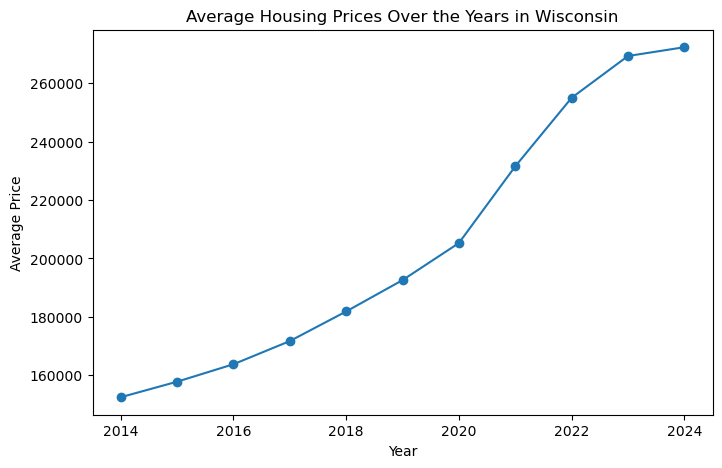

In [5]:
average_price_by_year = housing_data.groupby('Year')['Price'].mean()
line_chart = average_price_by_year.plot.line(figsize=(8, 5), marker='o', title='Average Housing Prices Over the Years in Wisconsin', xlabel = 'Year', ylabel = 'Average Price')

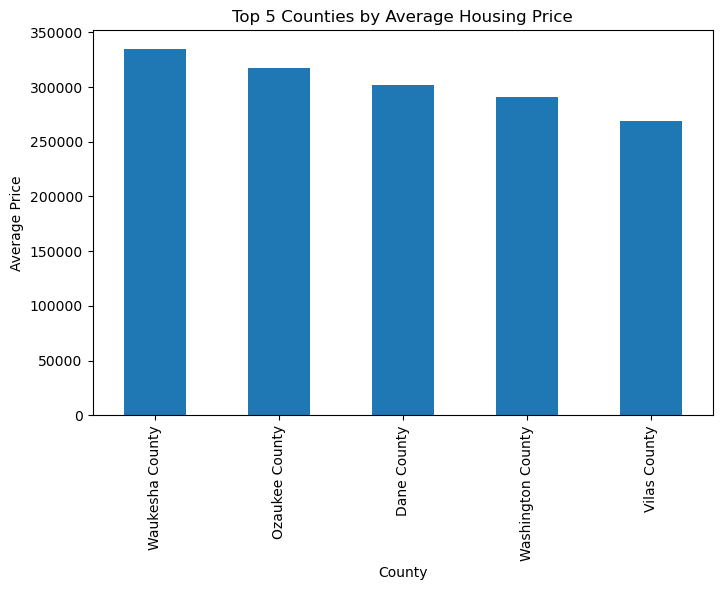

In [6]:
average_price_by_county = housing_data.groupby('CountyName')['Price'].mean()
top_5_counties = average_price_by_county.sort_values(ascending=False).head(5)

bar_chart = top_5_counties.plot.bar(figsize=(8, 5), title='Top 5 Counties by Average Housing Price', xlabel = 'County', ylabel = 'Average Price', rot=90)

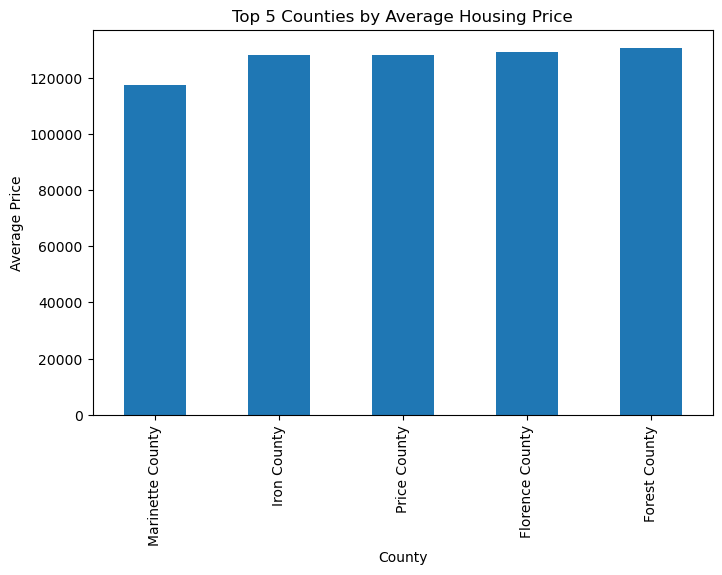

In [7]:
average_price_by_county = housing_data.groupby('CountyName')['Price'].mean()
top_5_counties = average_price_by_county.sort_values().head(5)

bar_chart = top_5_counties.plot.bar(figsize=(8, 5), title='Top 5 Counties by Average Housing Price', xlabel = 'County', ylabel = 'Average Price', rot=90)

<Axes: title={'center': 'Distribution of Housing Prices'}, xlabel='Price', ylabel='Frequency'>

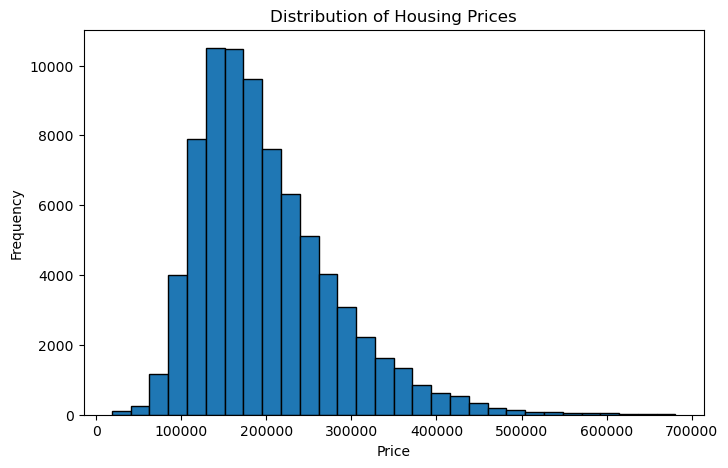

In [8]:
housing_data['Price'].plot.hist(bins=30, edgecolor='black', figsize=(8, 5), title='Distribution of Housing Prices', xlabel = 'Price', ylabel = 'Frequency')

<Axes: title={'center': 'Top 10 Counties by Percent Change in Average Housing Price'}, xlabel='County', ylabel='Percent Change in Average Price'>

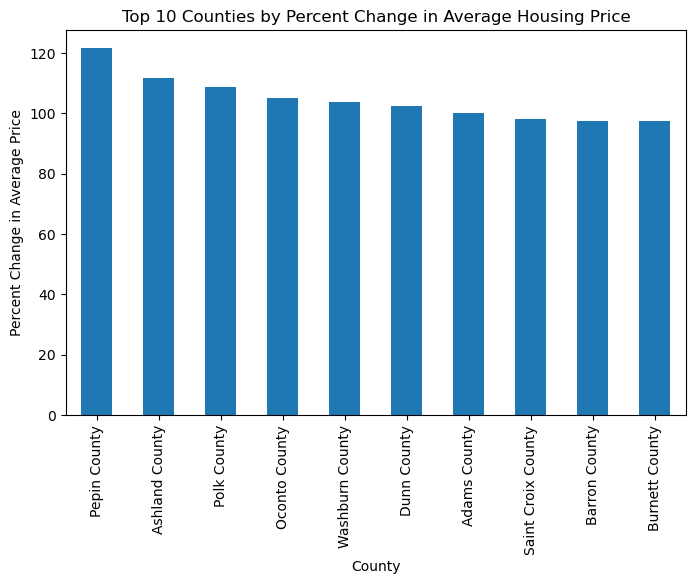

In [9]:
data_2014 = housing_data[housing_data['Year'] == 2014].groupby('CountyName')['Price'].mean()
data_2023 = housing_data[housing_data['Year'] == 2023].groupby('CountyName')['Price'].mean()

percent_change = ((data_2023 - data_2014) / data_2014) * 100

top_counties_percent_change = percent_change.sort_values(ascending=False).head(10)
top_counties_percent_change.plot.bar(figsize=(8, 5), title='Top 10 Counties by Percent Change in Average Housing Price', xlabel = 'County', ylabel = 'Percent Change in Average Price')

<Axes: title={'center': 'Top 10 Counties by Percent Change in Average Housing Price'}, xlabel='County', ylabel='Percent Change in Average Price'>

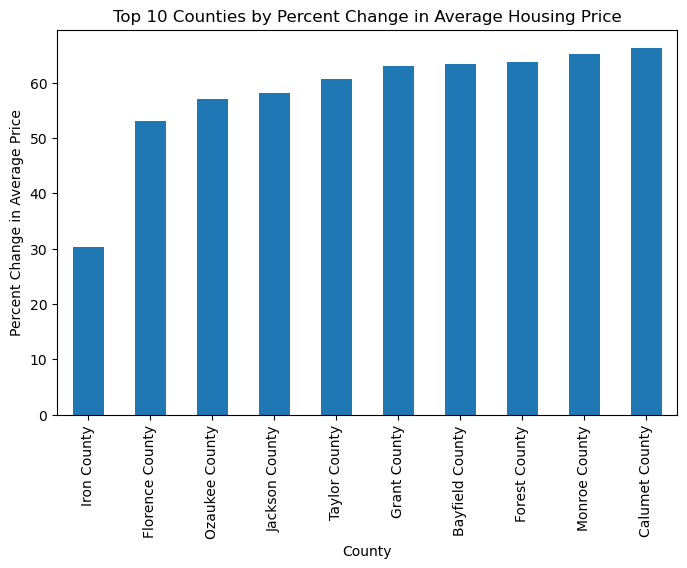

In [10]:
data_2014 = housing_data[housing_data['Year'] == 2014].groupby('CountyName')['Price'].mean()
data_2023 = housing_data[housing_data['Year'] == 2023].groupby('CountyName')['Price'].mean()

percent_change = ((data_2023 - data_2014) / data_2014) * 100

top_counties_percent_change = percent_change.sort_values().head(10)
top_counties_percent_change.plot.bar(figsize=(8, 5), title='Top 10 Counties by Percent Change in Average Housing Price', xlabel = 'County', ylabel = 'Percent Change in Average Price')

<Axes: xlabel='Year', ylabel='Average Price'>

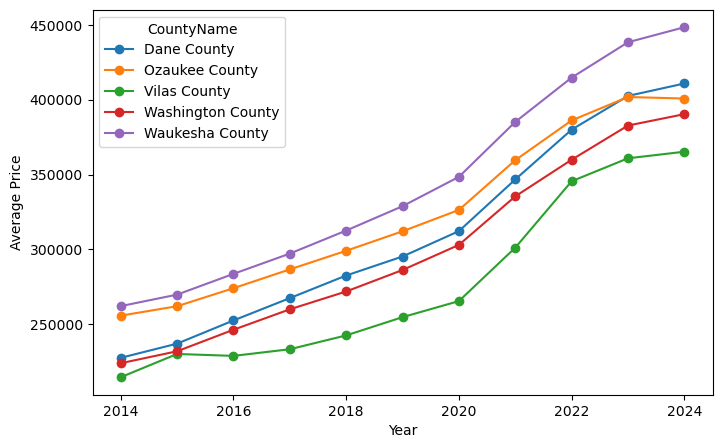

In [11]:
average_price_by_county_year = housing_data.groupby(['CountyName', 'Year'])['Price'].mean().reset_index()
top_counties = average_price_by_county_year.groupby('CountyName')['Price'].mean().nlargest(5).index
top_counties_data = average_price_by_county_year[average_price_by_county_year['CountyName'].isin(top_counties)]
pivot_data = top_counties_data.pivot(index='Year', columns='CountyName', values='Price')
pivot_data.plot(figsize=(8, 5), marker='o', xlabel = "Year", ylabel = "Average Price")